In [19]:
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
# optional, alta librarie de ploturi
import arviz as az
az.style.use('arviz-whitegrid')

In [21]:
# Lattice
N = 7
S = np.zeros((N+2,N+2,N+2))
J = 1 

# Steps
Ntr = 10
Nsteps = 100

In [22]:
for i in range(1,N+1):
    for j in range(1,N+1):
        for k in range(1,N+1):
            temp = np.random.random()
            if temp>1/2:
                S[i,j,k]=1
            else:
                S[i,j,k]=-1

In [23]:
# Choose temperature range
Ti = 7
dT = 0.1
Tf = 0.1

In [24]:
counter=0
T=Ti
Temp=[Ti]
M=[sum(sum(sum(S)))]

In [25]:
while T>Tf:
    mag = np.zeros((N+2,N+2,N+2))

    #Transitory period
    for k in range(1,Ntr):
        x = int(np.round(1+(N-1)*np.random.random()))
        y = int(np.round(1+(N-1)*np.random.random()))
        z = int(np.round(1+(N-1)*np.random.random()))

        DE = 4*J*S[x,y,z]*(S[x-1,y,z]+S[x,y-1,z]+S[x+1,y,z]+S[x,y+1,z]+S[x,y,z-1]+S[x,y,z+1])
        P = np.exp( -DE/Temp[counter])

        if P > np.random.random():
            S[x,y,z]=-S[x,y,z]
        
    #Transitory period
    for k in range(1,Nsteps):
        for j in range(1,N**2):
            x = int(np.round(1+(N-1)*np.random.random()))
            y = int(np.round(1+(N-1)*np.random.random()))
            z = int(np.round(1+(N-1)*np.random.random()))

            DE = 4*J*S[x,y,z]*(S[x-1,y,z]+S[x,y-1,z]+S[x+1,y,z]+S[x,y+1,z]+S[x,y,z-1]+S[x,y,z+1])
            P = np.exp( -DE/Temp[counter])

            if P>np.random.random():
                S[x,y,z]=-S[x,y,z]
        mag = mag+S
    
    counter = counter+1
    Temp.append(T-dT)
    T = T - dT

    M.append(sum(sum(sum(mag[1:N+1,1:N+1,1:N+1])))/Nsteps)

Text(0, 0.5, 'magnetizare')

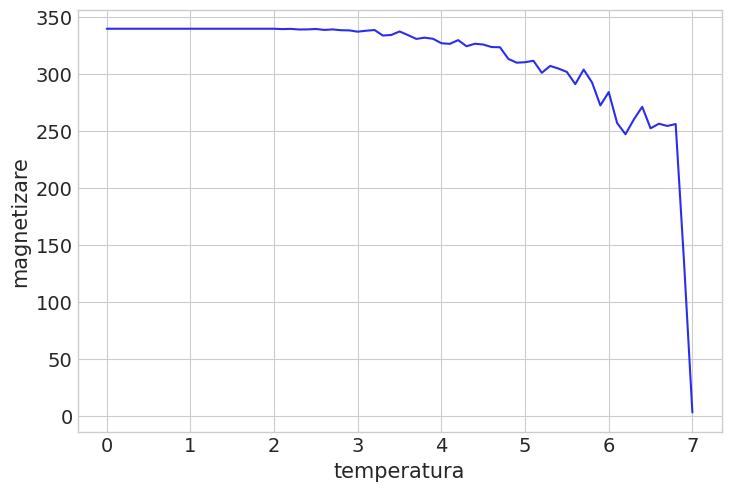

In [30]:
plt.figure()
plt.plot(Temp,M)
plt.xlabel('temperatura')
plt.ylabel('magnetizare')

In [ ]:
# T scade -> numarul de spin flips acceptati este din ce in ce mai mic
# pentru ca e defavorabil energetic

# T scade -> accepti doar acele stari care scad energia

# T scade -> distributia energiilor starilor pe care le parcurgi cu MC v a
# fi din ce in ce mai ingusta. 